In [ ]:
!wget http://cb.lk/covid_19

--2022-01-29 09:29:38--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 104.21.72.203, 172.67.187.81, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|104.21.72.203|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-01-29 09:29:38--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|104.21.72.203|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-01-29 09:29:39--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-01

In [ ]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [ ]:
TRAIN_PATH='/content/CovidDataset/Train'
TEST_PATH='/content/CovidDataset/Val'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import tensorflow as tf

Build CNN Model

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
train_datagen=image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 100,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 50,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs = 11,
    validation_data = validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size,
    verbose=1)

Epoch 1/11
2/2 [==============================] - 10s 6s/step - loss: 0.3189 - accuracy: 0.8950 - val_loss: 0.2539 - val_accuracy: 0.9400
Epoch 2/11
2/2 [==============================] - 7s 6s/step - loss: 0.2913 - accuracy: 0.8629 - val_loss: 0.2030 - val_accuracy: 0.9400
Epoch 3/11
2/2 [==============================] - 9s 5s/step - loss: 0.2807 - accuracy: 0.9050 - val_loss: 0.2130 - val_accuracy: 0.9200
Epoch 4/11
2/2 [==============================] - 7s 6s/step - loss: 0.2573 - accuracy: 0.9194 - val_loss: 0.2075 - val_accuracy: 0.9400
Epoch 5/11
2/2 [==============================] - 8s 5s/step - loss: 0.1945 - accuracy: 0.9250 - val_loss: 0.1503 - val_accuracy: 0.9800
Epoch 6/11
2/2 [==============================] - 7s 3s/step - loss: 0.3139 - accuracy: 0.8548 - val_loss: 0.1775 - val_accuracy: 0.9400
Epoch 7/11
2/2 [==============================] - 7s 3s/step - loss: 0.1867 - accuracy: 0.9194 - val_loss: 0.1817 - val_accuracy: 0.9200
Epoch 8/11
2/2 [========================

In [ ]:
model.save('model.h5')

In [ ]:
model.evaluate(train_generator)

3/3 [==============================] - 7s 2s/step - loss: 0.1279 - accuracy: 0.9509


[0.12788225710391998, 0.9508928656578064]

In [ ]:
model.evaluate(validation_generator)

2/2 [==============================] - 2s 734ms/step - loss: 0.0924 - accuracy: 0.9667


[0.09244666248559952, 0.9666666388511658]

In [ ]:
model=load_model('model.h5')

In [ ]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
path="/content/CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg"
img=image.load_img(path, target_size=(224,224))
img=image.img_to_array(img)/255
img=np.array([img])
img.shape

(1, 224, 224, 3)

In [ ]:
y_pred=model.predict(img)


In [ ]:
np.where(y_pred > 0.5, 1,0)


array([[0]])

In [ ]:
path="/content/CovidDataset/Val/Normal/NORMAL2-IM-0652-0001.jpeg"
img=image.load_img(path, target_size=(224,224))
img=image.img_to_array(img)/255
img=np.array([img])
img.shape


(1, 224, 224, 3)

In [ ]:
y_pred=model.predict(img)

In [ ]:
np.where(y_pred > 0.5, 1,0)

array([[1]])

In [ ]:
import cv2

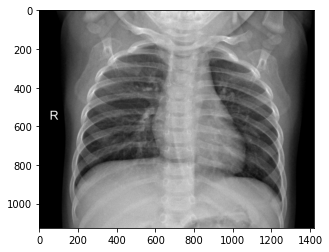

In [ ]:
im=cv2.imread('/content/CovidDataset/Val/Normal/NORMAL2-IM-0652-0001.jpeg')
plt.imshow(im, cmap='gray')